Import resources

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Read in and display the image

In [30]:
img = cv2.imread('pizza_bluescreen.jpg')

print('This image is:', type(img),
     'with dimensions:', img.shape)

This image is: <class 'numpy.ndarray'> with dimensions: (514, 816, 3)


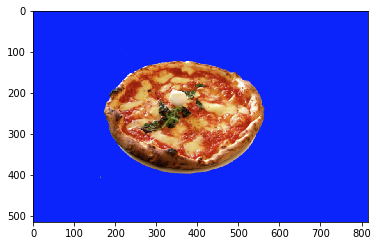

In [31]:
%matplotlib inline

# Make a copy of the image
img_copy = np.copy(img)

# Change color to RGB from BGR
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_copy);

Define the color threshold

In [0]:
# Define our color selection boundaries in RGB values
lower_blue = np.array([0,0,220])
upper_blue = np.array([50,70,255])

Create a mask

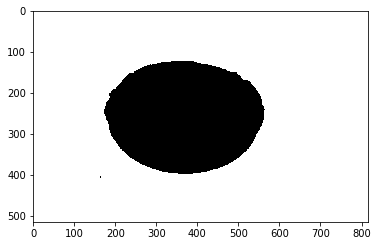

In [33]:
# Define the masked area
mask = cv2.inRange(img_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

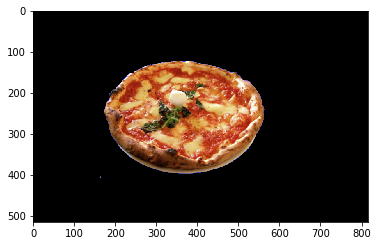

In [34]:
# Mask the image to let the pizza show through
masked_img = np.copy(img_copy)

masked_img[mask != 0] = [0,0,0]

# Display it!
plt.imshow(masked_img)

Mask and add a background image

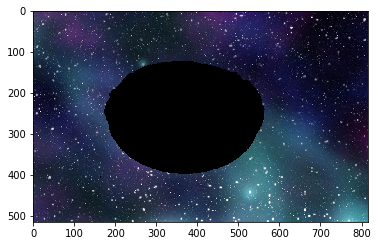

In [35]:
# Load in a background image, and convert it to RGB
background_img = cv2.imread('space_background.jpg')
background_img = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_img[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0]  = [0,0,0]

# Display the background
plt.imshow(crop_background)

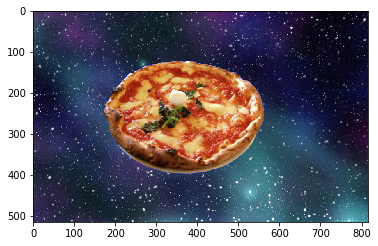

In [38]:
# Add the two images together to create a complete image!
complete_img = crop_background + masked_img
plt.imshow(complete_img)